# 01. Data Preprocessing

**Mục đích:** Tiền xử lý dữ liệu Peru cho các mô hình dự báo lạm phát

**Công việc:**
- Load dataset từ `../data/raw/`
- Exploratory Data Analysis (EDA)
- Xử lý missing values
- Feature engineering (nếu cần)
- Train/test split
- Lưu processed data vào `../data/processed/`

In [14]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import os

pd.set_option('display.max_columns', None)

In [15]:
try:
    df = pd.read_csv("../data/raw/df_raw.csv", index_col=0, parse_dates=True)
except FileNotFoundError:
    df = pd.read_csv("data/raw/df_raw.csv", index_col=0, parse_dates=True)

print("Dữ liệu ban đầu:")
display(df.head())
print("\nKích thước:", df.shape)


Dữ liệu ban đầu:


,CPI,Core CPI - Services - Dining Out,Terms of Trade - Exports,Terms of Trade - Imports,Chicken Placements (thousands),Private Credit - ME - Consumption (mill US$),Private Credit - MN - Consumption (mill S/),Private Credit - MN - Mortgage (mill S/),Capacity Utilization - Food & Beverages,Electricity Production - Lima (GWh),GDP - Agriculture,GDP - Fishing,GDP - Mining,GDP Growth - Non-Primary Manufacturing,GDP - Construction,GDP - Non-Primary Manufacturing,GDP Growth - Commerce (annual %),GDP - Other Services (index 2007=100),GDP by Expenditure - Domestic Demand (mill S/ 2007),GDP by Expenditure - Domestic Demand ex. Inventories (mill S/ 2007),Private Consumption (mill S/ 2007),Private Fixed Investment (mill S/ 2007),Public Consumption (mill S/ 2007),Public Fixed Investment (mill S/ 2007),Fishmeal Price (US$ per ton),Coffee Price (US$ per ton),Copper Price (¢US$ per lb),Gold (US$ per oz troy),Wheat Price (US$ per ton),Corn Price (US$ per ton),Soybean Oil Price (US$ per ton),Crude Oil Price (US$ per barrel),Real Exchange Rate Index (monthly %),Monetary Policy Rate,Reserve Requirement Rate,General Index (base 31/12/91 = 100),Selective Index (base 31/12/91 = 100),Tax Revenue - VAT (mill S/),Tax Revenue - Income Tax (mill S/),Macroeconomic Expectations - Inflation (12 months),Macroeconomic Expectations - GDP (12 months),Macroeconomic Expectations - Exchange Rate (12 months),Business Expectations - Economy (3 months),Business Expectations - Sector (3 months),Business Expectations - Demand (3 months),Business Expectations - Orders (MoM),Business Expectations - Inventory (MoM),Business Expectations - Sales (MoM),Business Expectations - Current Situation,"Labor Force (3-month MA, thousands)","Employed 14-24 (3-month MA, thousands)","Employed 25-44 (3-month MA, thousands)","Employed 45+ (3-month MA, thousands)","Independent Worker (3-month MA, thousands)","Dependent Worker (3-month MA, thousands)","Unpaid Worker (3-month MA, thousands)","Firms 1-10 Workers (3-month MA, thousands)","Firms 11-50 Workers (3-month MA, thousands)","Firms 51+ Workers (3-month MA, thousands)","Adequately Employed (3-month MA, thousands)","Underemployed (3-month MA, thousands)",Employment Ratio (3-month MA),Monthly Income (3-month MA),"Unemployment Rate (3-month MA, %)"
Fecha,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-02-01,0.293213,0.513753,2.084305,0.415673,-0.070560,0.013861,0.012647,0.018248,-0.003850,0.046000,0.002165,-0.352643,-0.045329,9.669807,0.094591,-0.029225,0.263734,0.019604,-0.032854,-0.024462,0.016117,-0.008281,-0.067526,-0.339678,0.001919,-0.115767,-0.028241,-0.017003,-0.015746,0.040318,0.024243,0.001950,-0.282546,0.0,0.129547,0.035569,0.040585,-0.299728,-0.220457,2.700000,5.225000,2.649167,0.038072,0.059661,0.041664,0.017285,0.009584,0.015828,0.000485,0.006375,0.023023,-0.009238,0.000183,0.017027,-0.015026,0.085068,0.014641,-0.061396,-0.006115,-0.000228,0.000940,-0.001258,0.001426,0.072148
2012-03-01,0.281043,0.505105,-1.918350,0.712507,0.117432,0.010176,0.012328,0.024442,0.030024,0.114160,0.127825,-0.084211,0.134341,-5.244168,0.183969,0.011659,-0.257012,0.063378,-0.010755,-0.009880,0.019923,-0.000406,-0.045637,-0.351547,-0.011243,-0.096231,-0.000083,-0.023145,-0.022043,-0.006961,0.018675,0.075762,-2.722775,0.0,-0.028241,0.038861,0.057213,0.023356,0.711334,2.700000,5.587500,2.646250,0.067526,0.017093,0.004452,0.048514,-0.033718,0.096998,0.021569,-0.002455,-0.016089,-0.004662,-0.000366,-0.007136,0.000473,-0.077565,-0.017944,-0.006126,0.018381,0.020207,-0.044616,-0.007690,0.029640,0.041515
2012-04-01,0.267810,0.498486,-0.974725,0.043185,-0.060808,0.013539,0.008976,0.018552,-0.042243,-0.099706,0.305056,0.345551,-0.100998,-0.651973,-0.077037,-0.049595,-0.168303,0.009809,0.021817,0.011995,0.020663,0.010334,-0.002168,-0.103219,0.010522,-0.061732,-0.024724,-0.004021,-0.051687,-0.012659,0.017666,-0.003256,-0.152224,0.0,-0.053482,-0.039560,-0.024852,0.082685,0.251882,2.900000,5.966667,2.613333,0.022793,-0.011438,0.006875,-0.006


Kích thước: (143, 64)


In [16]:
print("\nThông tin dữ liệu:")
df.info()

print("\nThống kê mô tả:")
display(df.describe())


Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2012-02-01 to 2023-12-01
Data columns (total 64 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   CPI                                                                  143 non-null    float64
 1   Core CPI - Services - Dining Out                                     143 non-null    float64
 2   Terms of Trade - Exports                                             143 non-null    float64
 3   Terms of Trade - Imports                                             143 non-null    float64
 4   Chicken Placements (thousands)                                       143 non-null    float64
 5   Private Credit - ME - Consumption (mill US$)                         143 non-null    float64
 6   Private Credit - MN - Consumption (mill S/)                        

,CPI,Core CPI - Services - Dining Out,Terms of Trade - Exports,Terms of Trade - Imports,Chicken Placements (thousands),Private Credit - ME - Consumption (mill US$),Private Credit - MN - Consumption (mill S/),Private Credit - MN - Mortgage (mill S/),Capacity Utilization - Food & Beverages,Electricity Production - Lima (GWh),GDP - Agriculture,GDP - Fishing,GDP - Mining,GDP Growth - Non-Primary Manufacturing,GDP - Construction,GDP - Non-Primary Manufacturing,GDP Growth - Commerce (annual %),GDP - Other Services (index 2007=100),GDP by Expenditure - Domestic Demand (mill S/ 2007),GDP by Expenditure - Domestic Demand ex. Inventories (mill S/ 2007),Private Consumption (mill S/ 2007),Private Fixed Investment (mill S/ 2007),Public Consumption (mill S/ 2007),Public Fixed Investment (mill S/ 2007),Fishmeal Price (US$ per ton),Coffee Price (US$ per ton),Copper Price (¢US$ per lb),Gold (US$ per oz troy),Wheat Price (US$ per ton),Corn Price (US$ per ton),Soybean Oil Price (US$ per ton),Crude Oil Price (US$ per barrel),Real Exchange Rate Index (monthly %),Monetary Policy Rate,Reserve Requirement Rate,General Index (base 31/12/91 = 100),Selective Index (base 31/12/91 = 100),Tax Revenue - VAT (mill S/),Tax Revenue - Income Tax (mill S/),Macroeconomic Expectations - Inflation (12 months),Macroeconomic Expectations - GDP (12 months),Macroeconomic Expectations - Exchange Rate (12 months),Business Expectations - Economy (3 months),Business Expectations - Sector (3 months),Business Expectations - Demand (3 months),Business Expectations - Orders (MoM),Business Expectations - Inventory (MoM),Business Expectations - Sales (MoM),Business Expectations - Current Situation,"Labor Force (3-month MA, thousands)","Employed 14-24 (3-month MA, thousands)","Employed 25-44 (3-month MA, thousands)","Employed 45+ (3-month MA, thousands)","Independent Worker (3-month MA, thousands)","Dependent Worker (3-month MA, thousands)","Unpaid Worker (3-month MA, thousands)","Firms 1-10 Workers (3-month MA, thousands)","Firms 11-50 Workers (3-month MA, thousands)","Firms 51+ Workers (3-month MA, thousands)","Adequately Employed (3-month MA, thousands)","Underemployed (3-month MA, thousands)",Employment Ratio (3-month MA),Monthly Income (3-month MA),"Unemployment Rate (3-month MA, %)"
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.283274,0.371246,0.116242,0.064510,0.003797,0.001961,0.008574,0.012522,0.003708,0.011433,0.011732,0.137998,0.006567,0.226021,0.043166,0.004121,0.101152,0.005894,0.002740,0.003085,0.002764,0.003259,0.005960,0.026351,0.004106,0.001466,0.001083,0.002076,0.002123,-0.000271,0.002080,0.003575,42.011610,0.016151,-0.001044,0.002906,0.002727,0.010265,0.048180,2.881351,3.920113,3.338341,0.007855,0.003075,0.002083,0.002985,0.001320,0.003829,-0.000250,0.002262,0.000249,0.001924,0.005469,0.004518,0.001993,0.004034,0.004130,0.002477,0.001288,0.002920,0.002715,0.001006,0.002862,0.001861
std,0.156216,0.184960,2.588655,1.275334,0.055970,0.022043,0.008219,0.007971,0.067126,0.135077,0.132096,0.648329,0.082762,7.038863,0.281229,0.088769,2.795349,0.060845,0.026064,0.028553,0.016518,0.061755,0.048880,0.214274,0.042947,0.075597,0.061222,0.042131,0.067125,0.065668,0.062957,0.111660,516.129408,0.156110,0.108631,0.058958,0.065509,0.117665,0.303483,0.788742,1.841720,0.420220,0.144211,0.101297,0.092119,0.096163,0.063223,

In [17]:
print("\nSố lượng giá trị thiếu mỗi cột:")
display(df.isna().sum())

df = df.ffill() 
print("\nSau khi xử lý missing:")
display(df.isna().sum())


Số lượng giá trị thiếu mỗi cột:


CPI                                            0
Core CPI - Services - Dining Out               0
Terms of Trade - Exports                       0
Terms of Trade - Imports                       0
Chicken Placements (thousands)                 0
                                              ..
Adequately Employed (3-month MA, thousands)    0
Underemployed (3-month MA, thousands)          0
Employment Ratio (3-month MA)                  0
Monthly Income (3-month MA)                    0
Unemployment Rate (3-month MA, %)              0
Length: 64, dtype: int64


Sau khi xử lý missing:


CPI                                            0
Core CPI - Services - Dining Out               0
Terms of Trade - Exports                       0
Terms of Trade - Imports                       0
Chicken Placements (thousands)                 0
                                              ..
Adequately Employed (3-month MA, thousands)    0
Underemployed (3-month MA, thousands)          0
Employment Ratio (3-month MA)                  0
Monthly Income (3-month MA)                    0
Unemployment Rate (3-month MA, %)              0
Length: 64, dtype: int64

In [18]:
duplicates = df.duplicated().sum()
print(f"\nSố dòng trùng lặp: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()


Số dòng trùng lặp: 0


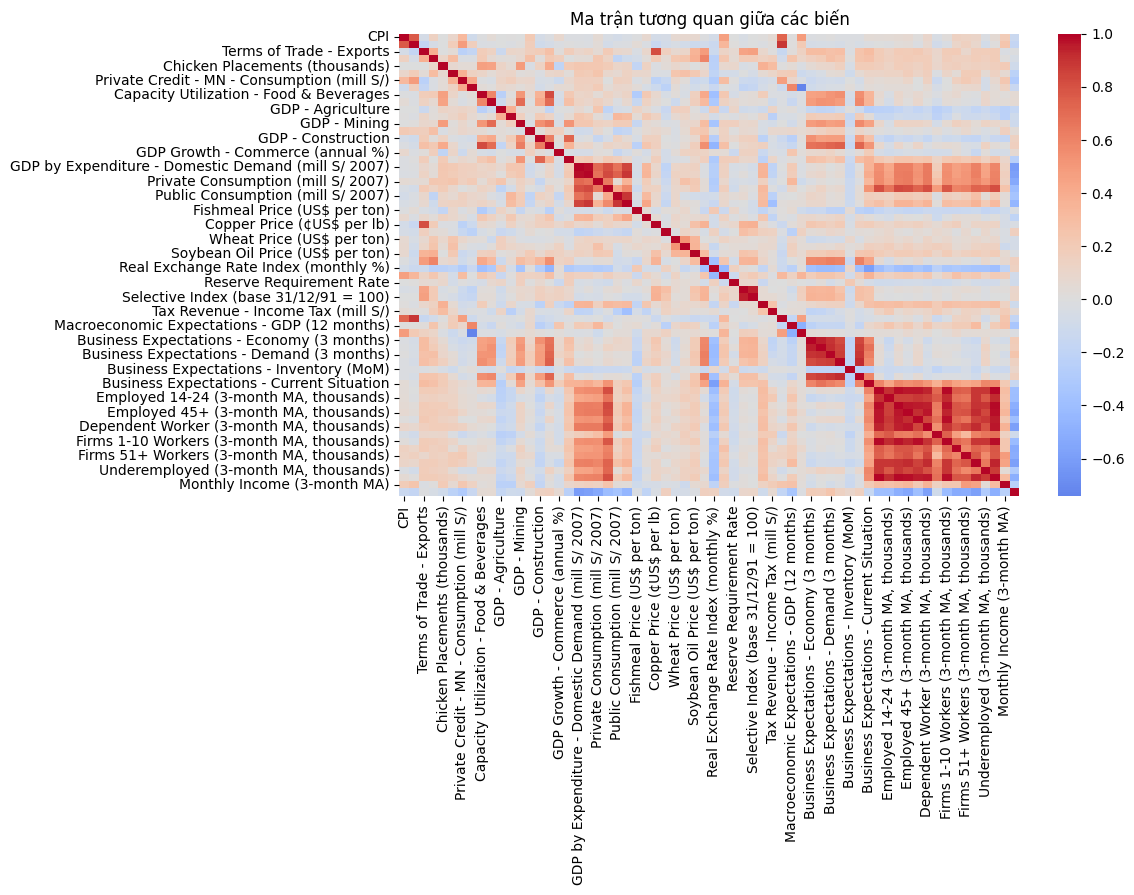

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm', center=0)
plt.title("Ma trận tương quan giữa các biến")
plt.show()

In [20]:
print("\nCác cột hiện có:", df.columns.tolist())

possible_targets = ['inflation', 'cpi', 'cpi_yoy', 'v005']
target_col = next((col for col in possible_targets if col in df.columns), df.columns[-1])

print(f"\nBiến mục tiêu được chọn: {target_col}")

if target_col not in df.columns:
    raise ValueError(f"Không tìm thấy cột mục tiêu '{target_col}' trong dữ liệu")


Các cột hiện có: ['CPI', 'Core CPI - Services - Dining Out', 'Terms of Trade - Exports', 'Terms of Trade - Imports', 'Chicken Placements (thousands)', 'Private Credit - ME - Consumption (mill US$)', 'Private Credit - MN - Consumption (mill S/)', 'Private Credit - MN - Mortgage (mill S/)', 'Capacity Utilization - Food & Beverages', 'Electricity Production - Lima (GWh)', 'GDP - Agriculture', 'GDP - Fishing', 'GDP - Mining', 'GDP Growth - Non-Primary Manufacturing', 'GDP - Construction', 'GDP - Non-Primary Manufacturing', 'GDP Growth - Commerce (annual %)', 'GDP - Other Services (index 2007=100)', 'GDP by Expenditure - Domestic Demand (mill S/ 2007)', 'GDP by Expenditure - Domestic Demand ex. Inventories (mill S/ 2007)', 'Private Consumption (mill S/ 2007)', 'Private Fixed Investment (mill S/ 2007)', 'Public Consumption (mill S/ 2007)', 'Public Fixed Investment (mill S/ 2007)', 'Fishmeal Price (US$ per ton)', 'Coffee Price (US$ per ton)', 'Copper Price (¢US$ per lb)', 'Gold (US$ per oz t

In [21]:
X = df.drop(columns=[target_col])
y = df[target_col]


In [22]:
split_index = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]


In [23]:
print("\n Kích thước sau chia:")
print(f"Train: {X_train.shape}, Test: {X_test.shape}")


 Kích thước sau chia:
Train: (114, 63), Test: (29, 63)


In [24]:

scaler = StandardScaler()
num_cols = X.select_dtypes(include=['number']).columns
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train[num_cols]),
    columns=num_cols,
    index=X_train.index
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test[num_cols]),
    columns=num_cols,
    index=X_test.index
)


In [25]:
X_train_scaled[target_col] = y_train.values
X_test_scaled[target_col] = y_test.values

In [26]:
os.makedirs("../data/processed", exist_ok=True)
X_train_scaled.to_csv("../data/processed/train_clean.csv", index=False)
X_test_scaled.to_csv("../data/processed/test_clean.csv", index=False)